In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [5]:
raw_train_data = pd.read_csv("D:\\Workspace\\WAN_2577_Shop_Test_Data_Sets\\0. 전처리 데이터\\WAN2577_Official_Test_Data_Pre_Process(240122)_rev.csv")
# delete the unused column
raw_train_data = raw_train_data.drop(columns=['Time', 'BWACS_CL', 'BWACS_Direction', 'CYL1_LW_Temp_PS', 'CYL1_LW_Temp_ES'])

td = raw_train_data['CYL1_LW_Temp_Mean']

In [56]:
td

0         71.20
1         71.40
2         72.05
3         72.30
4         72.45
          ...  
18805    139.50
18806    139.50
18807    139.45
18808    139.45
18809    139.45
Name: CYL1_LW_Temp_Mean, Length: 18810, dtype: float64

In [20]:
from pmdarima import auto_arima

model = auto_arima(td, seasonal=False, trace=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-96052.698, Time=3.42 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-82182.390, Time=1.90 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-88327.267, Time=1.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-96382.069, Time=3.85 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-82184.389, Time=0.71 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-96580.271, Time=8.38 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-96681.158, Time=10.91 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-91034.592, Time=5.54 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-96476.402, Time=13.21 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-96204.063, Time=4.63 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-92725.774, Time=2.36 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-96275.671, Time=6.58 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-96681.261, Time=4.08 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-96580.922, Time=2.74 sec
 AR

In [66]:
# ARIMA 모델 생성 및 학습
model = ARIMA(td, order=(6, 2, 3))
model_fit = model.fit()

# 예측값 계산
forecast = model_fit.predict(start=1)

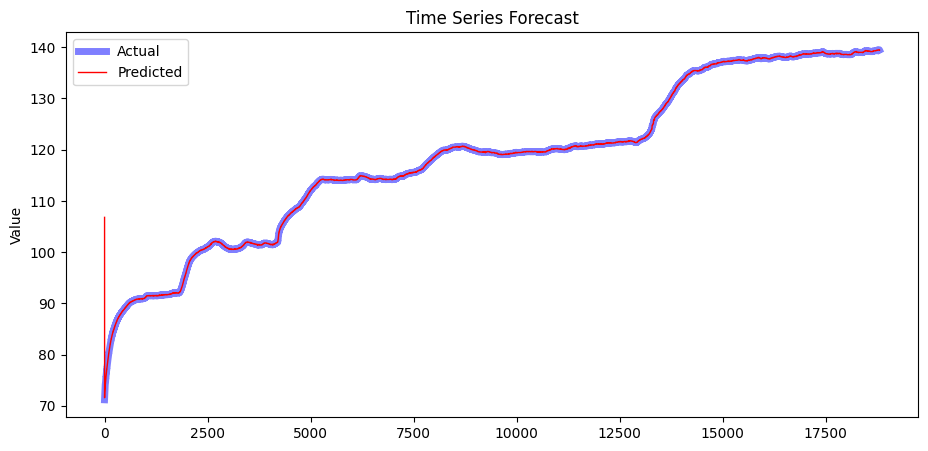

Mean Squared Error: 0.0675


In [67]:
forecast = model_fit.predict(start=1, end=len(td))  # 예측값 범위 확장

# MSE 계산 및 시각화
def plot_and_error(data, forecast):
    mse = mean_squared_error(data, forecast[:len(data)])
    plt.figure(figsize=(11, 5))
    plt.plot(data, color='blue', alpha=0.5, label='Actual', linewidth=5)  # Actual 그래프 두께 설정
    # plt.plot(range(len(data), len(forecast)), forecast[len(data):], color='green', linestyle='--', label='Future Prediction', linewidth=9.5)  # Future Prediction 그래프 두께 설정
    plt.plot(forecast[:len(data)], color='red', label='Predicted', linewidth=1)  # Predicted 그래프 두께 설정
    plt.title("Time Series Forecast")
    plt.ylabel("Value")
    plt.legend()
    plt.show()
    print('Mean Squared Error: {:.4f}'.format(mse))

plot_and_error(td, forecast)

In [53]:
forecast

1        106.800000
2         71.600000
3         72.464890
4         72.672107
5         72.776900
            ...    
18806    139.502663
18807    139.501950
18808    139.456168
18809    139.453951
18810    139.451907
Name: predicted_mean, Length: 18810, dtype: float64

In [54]:
td

0         71.20
1         71.40
2         72.05
3         72.30
4         72.45
          ...  
18805    139.50
18806    139.50
18807    139.45
18808    139.45
18809    139.45
Name: CYL1_LW_Temp_Mean, Length: 18810, dtype: float64

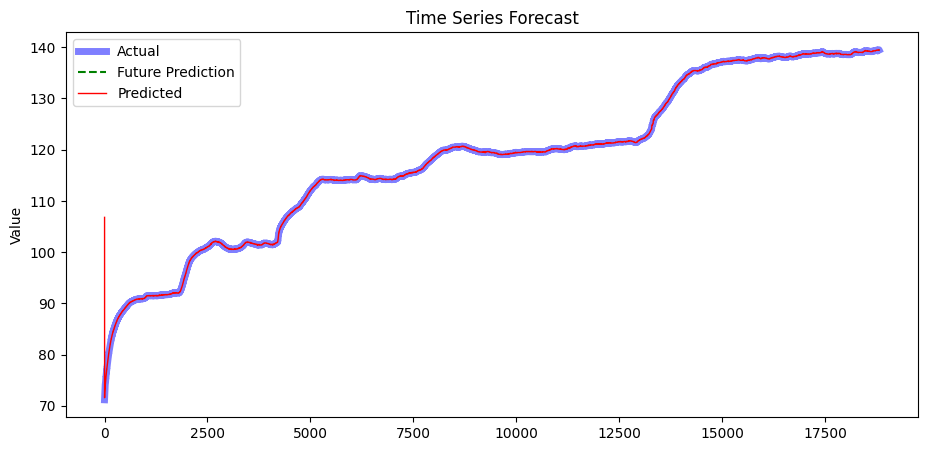

Mean Squared Error: 0.0675
Forecast 1: 139.4519, Actual 1: 139.4500
Forecast 2: 139.4516, Actual 2: 71.2000
Forecast 3: 139.4511, Actual 3: 71.4000
Forecast 4: 139.4492, Actual 4: 72.0500
Forecast 5: 139.4488, Actual 5: 72.3000


In [76]:
# 예측값 계산
forecast = model_fit.predict(start=1, end=len(td)+10)  # 예측값 범위 확장

# MSE 계산 및 시각화
def plot_and_error(data, forecast):
    mse = mean_squared_error(data, forecast[:len(data)])
    plt.figure(figsize=(11, 5))
    plt.plot(data, color='blue', alpha=0.5, label='Actual', linewidth=5)  # Actual 그래프 두께 설정
    plt.plot(range(len(data), len(forecast)), forecast[len(data):], color='green', linestyle='--', label='Future Prediction', linewidth=1.5)  # Future Prediction 그래프 두께 설정
    plt.plot(forecast[:len(data)], color='red', label='Predicted', linewidth=1)  # Predicted 그래프 두께 설정
    plt.title("Time Series Forecast")
    plt.ylabel("Value")
    plt.legend()
    plt.show()
    print('Mean Squared Error: {:.4f}'.format(mse))

plot_and_error(td, forecast)

# 입력받은 개수만큼 예측값과 실제값 출력
def print_forecast_actual(num):
    for i in range(num):
        print(f"Forecast {i+1}: {forecast[len(td)+i]:.4f}, Actual {i+1}: {td.iloc[-1+i]:.4f}")

num_forecasts = int(input("Enter the number of forecasts to display: "))
print_forecast_actual(num_forecasts)